In [1]:
# Warmup 1: Complete the recursive function.
#           Write a function that prints nested lists with indenting
#

fav_stuff = [  "road bike",
    ["PB&J", "brownies", "spaghetti", "apples"] , 
             ("Brooks Ghost 13", "hoodie", "gloves"), 
             "macbook air", 
             [ "Johndee.com", "https://www.weather.gov/mkx/"],
             ["A", "K", ("S", "D", "K")]
            ]

def print_with_indenting(directory, indent_level):
    for subitem in directory:
        if type(subitem) == list or type(subitem) == tuple:
            print("\t" * indent_level + str(type(subitem)))
            # TODO make recursive call
            print_with_indenting(subitem, indent_level + 1)
        else:
            print("\t" * indent_level + str(subitem))
        
print_with_indenting(fav_stuff, 0)

road bike
<class 'list'>
	PB&J
	brownies
	spaghetti
	apples
<class 'tuple'>
	Brooks Ghost 13
	hoodie
	gloves
macbook air
<class 'list'>
	Johndee.com
	https://www.weather.gov/mkx/
<class 'list'>
	A
	K
	<class 'tuple'>
		S
		D
		K


[PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20mystery%28a,%20b%29%3A%20%0A%23%20precondition%3A%20assume%20a%20%3E%200%20and%20b%20%3E%200%0A%20%20%20%20if%20b%20%3D%3D%201%3A%20%0A%20%20%20%20%20%20%20%20return%20a%3B%0A%20%20%20%20return%20a%20*%20mystery%28%20a,%20b%20-%201%20%29%0A%0A%23%20make%20a%20function%20call%20here%0Amystery%287,%205%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [2]:
# Warmup 2: Trace Recursion by hand .... possible exam question

def mystery(a, b): 
# precondition: assume a > 0 and b > 0
    if b == 1: 
        return a;
    return a * mystery( a, b - 1 )

# make a function call here
mystery(7, 5)

#Q: What would be the result if we call
#.   mystery(-3, -1)  ??
# If b starts at -1, and we subtract 1 each time we call a mystery, it will never == 1


16807

## Lecture 23: Functions are Objects!

As we have learned previously, all variables in Python are stored as objects.

This is also true for functions, and it gives us more power as programmers.

**Learning Objectives:**

- Define a function reference and trace code that uses function references.
- Explain the default use of sorted() on lists of tuples, and dictionaries.
- Sort a list of tuples, a list of dictionaries, or a dictionary using a function as a key.
- Use a lambda expression when sorting.

In [3]:
# function references
# try this in Python Tutor

x = [1,2,3]
y = x

def f(some_list):   # what is f?  its a function but also an object
    return some_list[-1]

z = f(y)  # z stores the result of a call to f

g = f  # what is g? it is a reference to an object that is a function

# TODO:  similar to line 10, store the result of a call to g

w = g(x)   # calls the same function
w

3

### Define a function reference and trace code that uses function references.

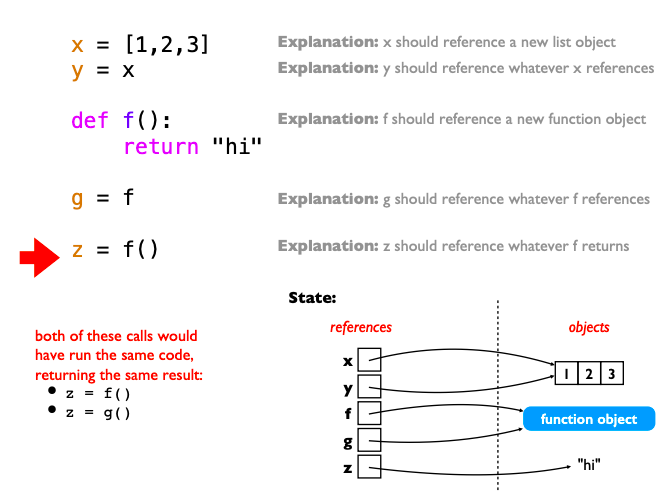

[PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20hammer%28%29%3A%0A%20%20%20%20print%28%22tap%20tap%20tap%22%29%0A%20%20%20%20%0Adef%20call_n_times%28f,%20n%29%3A%0A%20%20%20%20for%20i%20in%20range%28n%29%3A%0A%20%20%20%20%20%20%20%20f%28%29%0A%0Acall_n_times%28hammer,%203%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [4]:
# function references can be passed as arguments ...Wow!

# first: try this in Python Tutor

def hammer():
    print("tap tap tap")

# then on your own: define a function called screwdriver

def screwdriver():
    print("churn churn churn")

def call_n_times(f, n):
    for i in range(n):
        f()

call_n_times(hammer, 3)

# then on your own:  invoke call_n_times with screwdriver and 5 as arguments

call_n_times(screwdriver, 5)


tap tap tap
tap tap tap
tap tap tap
churn churn churn
churn churn churn
churn churn churn
churn churn churn
churn churn churn


## Your turn!
Calculate the distance between two points using either the manhattan or euclidean distance.

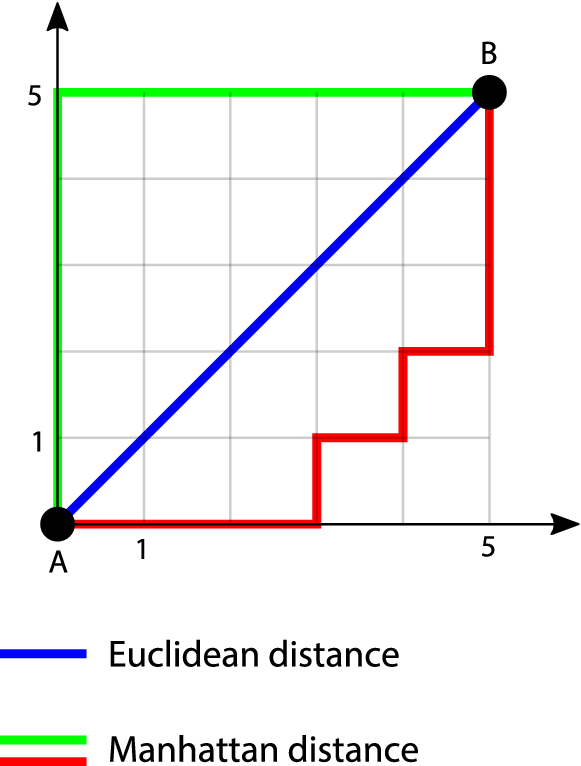

Source: https://www.researchgate.net/figure/Example-of-Euclidean-and-Manhattan-distances-between-two-points-A-and-B-The-Euclidean_fig8_333430988

### Review: NamedTuples

We create a namedtuple `Point` with named attributes `x` and `y`. We then create lists of points we want to calculate distances between

In [5]:
from collections import namedtuple

Point = namedtuple("Point", ["x", "y"])

left_points = [
    Point(0, 0),
    Point(3, 3),
    Point(2, 2)
]

right_points = [
    Point(5, 5),
    Point(0, 3),
    Point(2, 2)
]

### Complete the function `calculate_distances`

We already did the math behind `manhattan_distance` and `euclidean_distance` for you!

**Hint:** `distance_algo` should be a reference to a function that calculates distance between two points.

Then, call calculate_distances measuring first in manhattan_distance, then euclidean_distance.

In [6]:
import math

def manhattan_distance(point1, point2):
    dist_x = abs(point1.x - point2.x)
    dist_y = abs(point1.y - point2.y)
    return dist_x + dist_y
    
def euclidean_distance(point1, point2):
    dist_x = (point1.x - point2.x) ** 2
    dist_y = (point1.y - point2.y) ** 2
    return math.sqrt(dist_x + dist_y)

def calculate_distances(distance_algo):
    for i in range(len(left_points)):
        left_point = left_points[i]
        right_point = right_points[i]
        print(distance_algo(left_point, right_point))

calculate_distances(manhattan_distance)
calculate_distances(euclidean_distance)

10
3
0
7.0710678118654755
3.0
0.0


### Explain the default use of sorted() on lists of tuples, and on dictionaries.


In [7]:
# first... did you know that sort/sorted takes a 2nd argument called reverse?

populations = [55, 77, 33, 99, 22]
# TODO: sort populations in reverse
sorted(populations, reverse=True)

[99, 77, 55, 33, 22]

In [8]:
# Sorting part 1....how are lists of tuples sorted?
# olympic womens hockey badgers...first, last, age

owhockey_badgers = [ ("Hillary", "Knight", 32 ), 
             ("Brianna", "Decker", 30), 
            ("Amanda", "Kessel", 30),
            ("Alex", "Cavalenni", 30), 
            ("Caroline", "Harvey", 19),
            ("Abbey", "Roque", 24)
           ]


# call sorted on this list of tuples
sorted(owhockey_badgers)
# what did this make?  How was it sorted? 

[('Abbey', 'Roque', 24),
 ('Alex', 'Cavalenni', 30),
 ('Amanda', 'Kessel', 30),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19),
 ('Hillary', 'Knight', 32)]

In [9]:
# sorting part 2:  define a function that returns a value from a tuple
def select0(some_tuple):  # function must have exactly one parameter
    return some_tuple[0]

def select1(some_tuple):
    return some_tuple[1]

def select2(some_tuple):
    return some_tuple[2]

# Test these functions on the tuple ("Mike", "Gurmail", "Cole")
my_tuple = ("Mike", "Gurmail", "Cole")
select1(my_tuple)


'Gurmail'

In [10]:
# call sorted using the 'key' argument 
# sort and sorted can take a parameter named key
# key is a reference to a function!

sorted(owhockey_badgers, key=select2)

[('Caroline', 'Harvey', 19),
 ('Abbey', 'Roque', 24),
 ('Brianna', 'Decker', 30),
 ('Amanda', 'Kessel', 30),
 ('Alex', 'Cavalenni', 30),
 ('Hillary', 'Knight', 32)]

In [11]:
# sort the list of tuples based on the last name
sorted(owhockey_badgers, key=select1)

[('Alex', 'Cavalenni', 30),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19),
 ('Amanda', 'Kessel', 30),
 ('Hillary', 'Knight', 32),
 ('Abbey', 'Roque', 24)]

In [12]:
# sort the list of tuples based on the age
sorted(owhockey_badgers, key=select2)

[('Caroline', 'Harvey', 19),
 ('Abbey', 'Roque', 24),
 ('Brianna', 'Decker', 30),
 ('Amanda', 'Kessel', 30),
 ('Alex', 'Cavalenni', 30),
 ('Hillary', 'Knight', 32)]

### Using `lambda`
- `lambda` functions are a way to abstract a function reference
- lambdas are simple functions with:
    - multiple possible parameters
    - single expression line as the function body
- lambdas are useful abstractions for:
    - mathematical functions
    - lookup operations
- lambdas are often associated with a collection of values within a list
- Syntax: 
```python 
lambda parameters: expression
```


In [13]:
# sorting part 3....using lambdas

'''
def no_name(each_tuple):
    return each_tuple[-1]
'''

sorted(owhockey_badgers, key = lambda each_tuple : each_tuple[-1])

# read the lambda as: my no-name function has each_tuple as a parameter
#                     and returns each_tuple[-1] (the last element)
# the variable 'each_tuple' is like a function parameter

[('Caroline', 'Harvey', 19),
 ('Abbey', 'Roque', 24),
 ('Brianna', 'Decker', 30),
 ('Amanda', 'Kessel', 30),
 ('Alex', 'Cavalenni', 30),
 ('Hillary', 'Knight', 32)]

In [14]:
# TODO: sort the list by the length of the first name
'''
def no_name(x):
    return len(x[0])
'''
sorted(owhockey_badgers, key = lambda x : len(x[0]))

[('Alex', 'Cavalenni', 30),
 ('Abbey', 'Roque', 24),
 ('Amanda', 'Kessel', 30),
 ('Hillary', 'Knight', 32),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19)]

In [15]:
# TODO: Sort the list by the length of their full name
'''
def no_name(player):
    return len(player[0]) + len(player[1])
'''
sorted(owhockey_badgers, key = lambda player : len(player[0]) + len(player[1]))

[('Abbey', 'Roque', 24),
 ('Amanda', 'Kessel', 30),
 ('Hillary', 'Knight', 32),
 ('Brianna', 'Decker', 30),
 ('Alex', 'Cavalenni', 30),
 ('Caroline', 'Harvey', 19)]

### OK, I can sort a list of tuples....what about a list of dictionaries?

In [16]:

hurricanes = [
    {"name": "Calvin", "year": 2000},
    {"name": "Alexandria", "year": 1980, "speed": 100},
    {"name": "Blanc", "year": 1990, "speed": 250},
]

# call sorted on hurricanes and use a lambda expression to grab the year
sorted(hurricanes, key = lambda  d : d["year"], reverse=True)


[{'name': 'Calvin', 'year': 2000},
 {'name': 'Blanc', 'year': 1990, 'speed': 250},
 {'name': 'Alexandria', 'year': 1980, 'speed': 100}]

In [17]:
# sort hurricanes alphabetically by name
# for you to do on your own...see the above example
sorted(hurricanes, key = lambda  d : d["name"])

[{'name': 'Alexandria', 'year': 1980, 'speed': 100},
 {'name': 'Blanc', 'year': 1990, 'speed': 250},
 {'name': 'Calvin', 'year': 2000}]

In [18]:
# on your own, sort hurricanes by speed.....
sorted(hurricanes, key = lambda  d : d.get("speed", 0))

[{'name': 'Calvin', 'year': 2000},
 {'name': 'Alexandria', 'year': 1980, 'speed': 100},
 {'name': 'Blanc', 'year': 1990, 'speed': 250}]

### This is all great, but what I'd really like to do is to sort dictionaries!


In [19]:
menu = { 'pie': 3.95, 
         'ala mode':1.50, 
         'donut': 1.25, 
         'cookie': 0.79, 
         'milk':1.65,
          'loaf': 5.99,
        'hot dog': 4.99}

# sorted (dict) returns a list of the keys sorted
sorted(menu)


['ala mode', 'cookie', 'donut', 'hot dog', 'loaf', 'milk', 'pie']

In [20]:
# but we can make progress on this by using the .items() method 
menu.items()

dict_items([('pie', 3.95), ('ala mode', 1.5), ('donut', 1.25), ('cookie', 0.79), ('milk', 1.65), ('loaf', 5.99), ('hot dog', 4.99)])

In [21]:
# that looks like a list of tuples!

# let's sort menu.items() the same way we sorted a list of tuples

sorted(menu.items(), key = lambda t : t[0] ) # set the sorting key to a lambda expressoin

[('ala mode', 1.5),
 ('cookie', 0.79),
 ('donut', 1.25),
 ('hot dog', 4.99),
 ('loaf', 5.99),
 ('milk', 1.65),
 ('pie', 3.95)]

In [22]:
# now let's turn this list of tuples into a dict
dict(sorted(menu.items(), key=lambda thing: thing[0]))

{'ala mode': 1.5,
 'cookie': 0.79,
 'donut': 1.25,
 'hot dog': 4.99,
 'loaf': 5.99,
 'milk': 1.65,
 'pie': 3.95}

In [23]:
# can you change the previous code to sort by price? 
dict(sorted(menu.items(), key=lambda thing: thing[1]))

{'cookie': 0.79,
 'donut': 1.25,
 'ala mode': 1.5,
 'milk': 1.65,
 'pie': 3.95,
 'hot dog': 4.99,
 'loaf': 5.99}

In [24]:
# can you sort the dictionary by the length of the name? 
dict(sorted(menu.items(), key=lambda thing: len(thing[0])))

{'pie': 3.95,
 'milk': 1.65,
 'loaf': 5.99,
 'donut': 1.25,
 'cookie': 0.79,
 'hot dog': 4.99,
 'ala mode': 1.5}

##  After Lecture

In [25]:
# Practice sorting a list of tuples

# Practice sorting a list of dictionaries 

# Practice sorting a dictionary by keys

# Practice sorting a dictionary by values

